<a href="https://colab.research.google.com/github/leozhang1/MachineLearning_Practice/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.kaggle.com/c/titanic/data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')


Q1: In training set, which features are available?


In [57]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Q2: In training set, which features are categorical?


In [59]:
train_df.select_dtypes(include=object)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


Q3: In training set, which features are numerical (e.g., discrete, continuous, or time series based)?


In [60]:
train_df.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


Q4: In training set, which features are mixed data types (Carbin is not mixed data type: [C19 C18
C17], Ticket is a mixed data type: 342354, SA/12434324 )?


In [62]:
mixed_columns = []

for column in train_df.columns:
  unique_types = train_df[column].apply(type).unique()
  print(column, unique_types)
  if len(unique_types) > 1:
    mixed_columns.append(column)

mixed_columns


PassengerId [<class 'int'>]
Survived [<class 'int'>]
Pclass [<class 'int'>]
Name [<class 'str'>]
Sex [<class 'str'>]
Age [<class 'float'>]
SibSp [<class 'int'>]
Parch [<class 'int'>]
Ticket [<class 'str'>]
Fare [<class 'float'>]
Cabin [<class 'float'> <class 'str'>]
Embarked [<class 'str'> <class 'float'>]


['Cabin', 'Embarked']

Q5: In training set, which features contain blank, null or empty values? In test set, which features
contain blank, null or empty values?


In [65]:
# train_df.isna().any()
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

Q6: In training set, what are the data types (e.g., integer, floats or strings ) for various features?


In [66]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Q7: In training set, to understand the distribution of numerical feature values across the samples,
please list the properties, including count, mean, std, min, 25% percentile, 50% percentile, 75%
percentile, max, of numerical features?


In [67]:
train_df.describe(include=[float,int])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Q8: In training set, to understand the distribution of categorical features, we define: count is the total
number of categorical values per column; unique is the total number of unique categorical values per
column; top is the most frequent categorical value; freq is the total number of the most frequent
categorical value. Please list the properties, including count, unique, top, freq, of categorical
features?


In [68]:
train_df.astype('category').describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714.0,891,891,891,891.00,204,889
unique,891,2,3,891,2,88.0,7,7,681,248.00,147,3
top,1,0,3,"Abbing, Mr. Anthony",male,24.0,0,0,1601,8.05,C23 C25 C27,S
freq,1,549,491,1,577,30.0,608,678,7,43.00,4,644


Q9: In training set, can you observe significant correlation (average survivied ratio>0.5) among the
group of Pclass=1 and Survived? If Pclass has significant correlation with Survived, we should
include this feature in the predictive model. Based on your computation, will you include this feature
in the predictive model?


In [70]:
subset = train_df[(train_df['Pclass'] == 1) & (train_df['Survived'] == 1)]
correlation = subset['Pclass'].corr(subset['Survived'])

# prints nan because all both subsets have the exact same values
# print(correlation)

# and there is a negative correlation of 33% overall between the two columns:
print(train_df['Pclass'].corr(train_df['Survived']))


-0.33848103596101475


Q10: In training set, are Women (Sex=female) were more likely to have survived?

In [6]:
# total num of females
female_total = train_df[(train_df.Sex == 'female')].Sex.count()
female_total # 314 females

# female survivors
female_survived_cnt = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].Survived.count()
female_survived_cnt # 233 female living


print((female_survived_cnt / female_total) * 100)

# total num of males
male_total = train_df[(train_df.Sex == 'male')].Sex.count()
male_total # 314 males

# male survivors
male_survived_cnt = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].Survived.count()
male_survived_cnt # 233 male living


print((male_survived_cnt / male_total) * 100)

74.20382165605095
18.890814558058924


Q11: In training set, let us start by understanding correlations between a numeric feature (Age) and
our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical
variables like Age where banding or ranges will help identify useful patterns. The histogram can
indicate distribution of samples using automatically defined bins or equally ranged bands. This helps
us answer questions relating to specific bands (e.g., infants, old). Please plot the histograms
between ages and Survived (Figure 1 is an example), and answer the following questions:


• Do infants (Age <=4) have high survival rate?

• Do oldest passengers (Age = 80) survive?

• Do large number of 15-25 year olds not survive?

Based on your analysis of the figures,

• Should we consider Age in our model training? (If yes, then we should complete the
Age feature for null values.)

• Should we should band age groups?

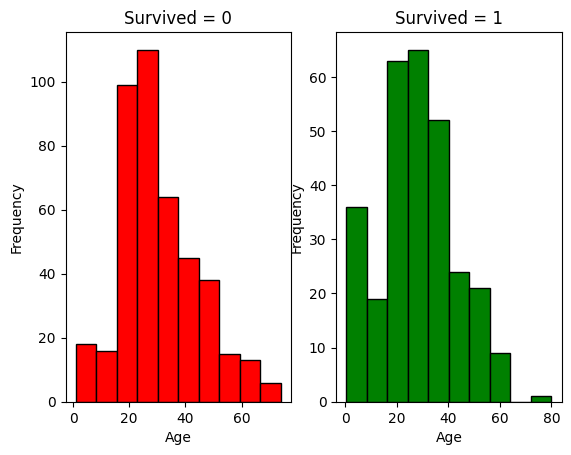

In [3]:
pclass1_deaths = train_df[(train_df.Pclass == 1) & (train_df.Survived == 0)]['Age']
pclass2_deaths = train_df[(train_df.Pclass == 2) & (train_df.Survived == 0)]['Age']
pclass3_deaths = train_df[(train_df.Pclass == 3) & (train_df.Survived == 0)]['Age']

pclass1_survivors = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1)]['Age']
pclass2_survivors = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1)]['Age']
pclass3_survivors = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1)]['Age']



train_died = train_df.query('Survived == 0') # subset of data for records that did not survive
train_survived = train_df.query('Survived == 1') # subset of data for records that survived

# histogram of survived vs deaths by ages
plt.figure('Ttianic surival vs death') # create and name the figure
plt.subplot(121) # subplot 1 (rows 1, columns 2, plot number)
plt.hist(train_died['Age'], color='r', edgecolor='black') # create histogram of age from query (did not survive)
plt.title('Survived = 0') # title subplot
plt.xlabel('Age') # label X-Axis
plt.ylabel('Frequency') # label y-Axis

plt.subplot(122) # subplot 2 (rows 1, columns 2, plot number)
plt.hist(train_survived['Age'], color='g', edgecolor='black') # create histogram of age from query (survived)
plt.title('Survived = 1') # title subplot
plt.xlabel('Age') # label X-Axis
plt.ylabel('Frequency') # label y-Axis
plt.show() # display histograms


'''
• Do infants (Age <=4) have high survival rate?

• Do oldest passengers (Age = 80) survive?

• Do large number of 15-25 year olds not survive?
Yes, more have died than survived

Based on your analysis of the figures,

• Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)
Yes

• Should we should band age groups?

Yes, we just need to make generalizations from the data given and the plot below already does that
'''

Q12: In training set, we can combine three features (age, Pclass, and survivied) for identifying
correlations using a single plot. This can be done with numerical and categorical features which
have numeric values.

Please plot the plot using python, and answer the following questions:

• Does Pclass=3 have most passengers, however most did not survive?

• Do infant passengers in Pclass=2 and Pclass=3 mostly survive?

• Do most passengers in Pclass=1 survive?

• Does Pclass vary in terms of Age distribution of passengers?

• Should we consider Pclass for model training?

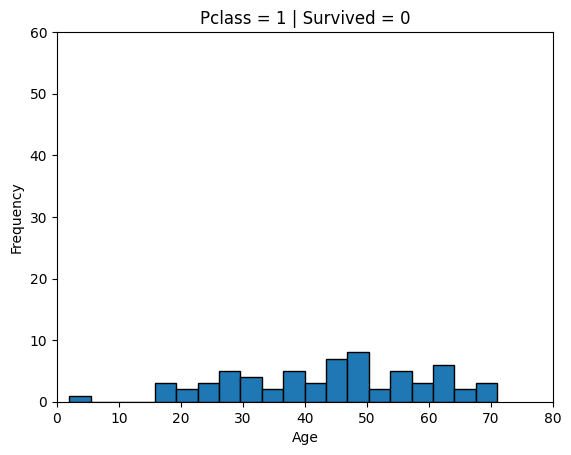

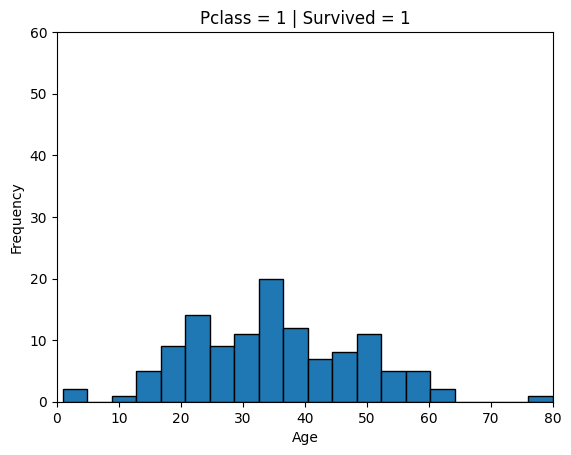

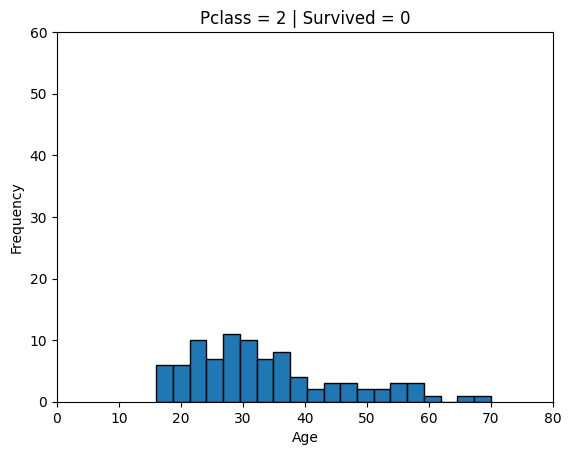

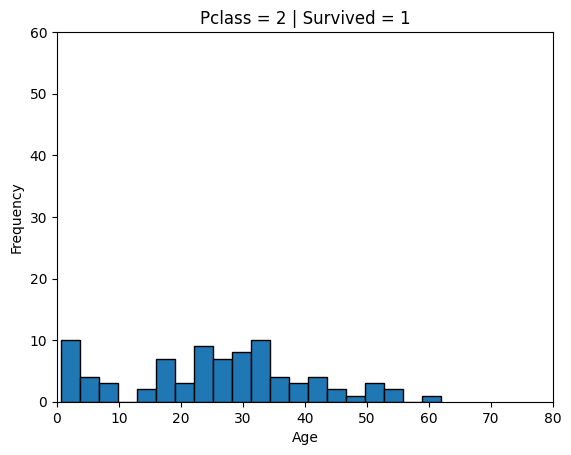

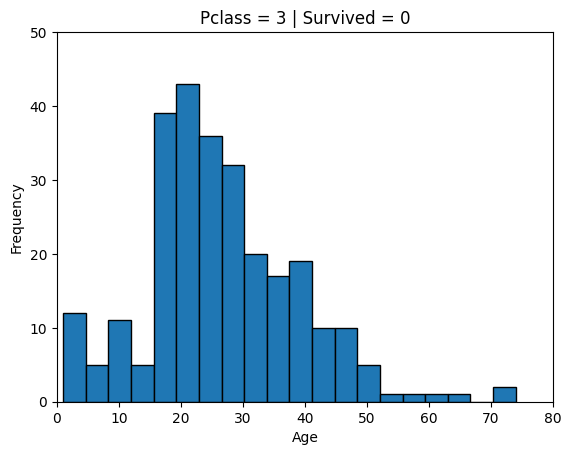

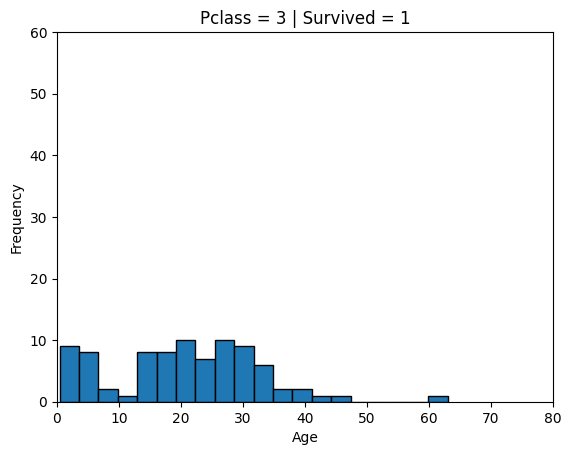

In [4]:
plt.figure('Ttianic surival vs death') # create and name the figure

plt.hist(pclass1_deaths, edgecolor='black', bins=20)
plt.title('Pclass = 1 | Survived = 0') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.show()

plt.hist(pclass1_survivors, edgecolor='black', bins=20)
plt.title('Pclass = 1 | Survived = 1') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.show()

plt.hist(pclass2_deaths, edgecolor='black', bins=20)
plt.title('Pclass = 2 | Survived = 0') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.show()

plt.hist(pclass2_survivors, edgecolor='black', bins=20)
plt.title('Pclass = 2 | Survived = 1') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.show()

plt.hist(pclass3_deaths, edgecolor='black', bins=20)
plt.title('Pclass = 3 | Survived = 0') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 50)
plt.show()

plt.hist(pclass3_survivors, edgecolor='black', bins=20)
plt.title('Pclass = 3 | Survived = 1') # title subplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.show()

Q13: In training set, we want to correlate categorical features (with non-numeric values) and numeric
features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-
numeric), Fare (Numeric continuous), with Survived (Categorical numeric). Please plot a figure to
illustrate the correlations of Embarked, Sex, Fare, and Survived.


And answer the following questions:

• Do higher fare paying passengers have better survival?

• Should we consider banding fare feature?

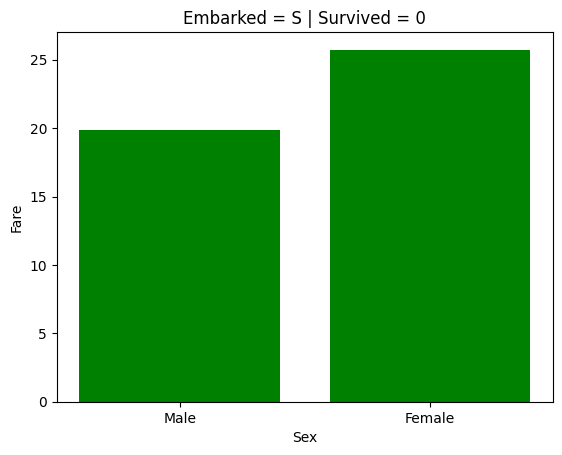

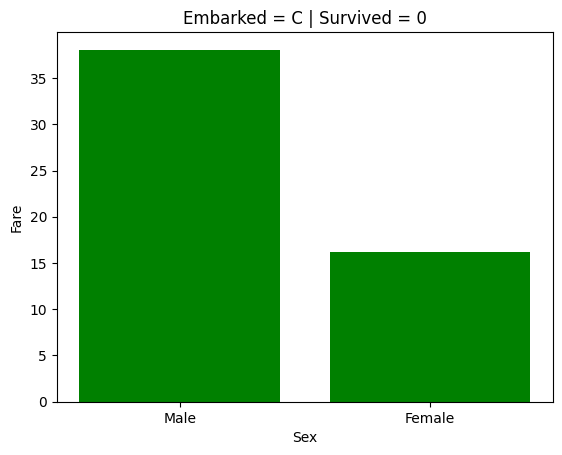

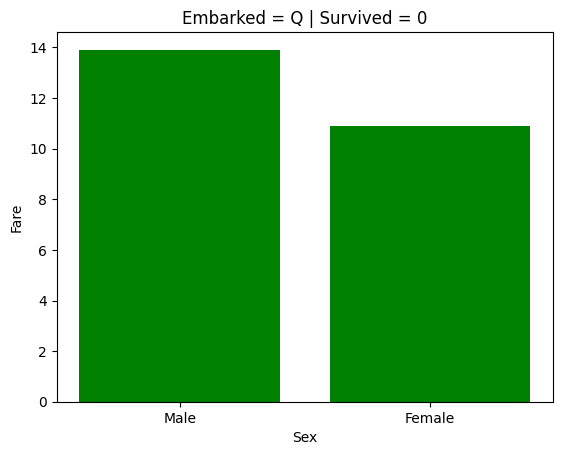

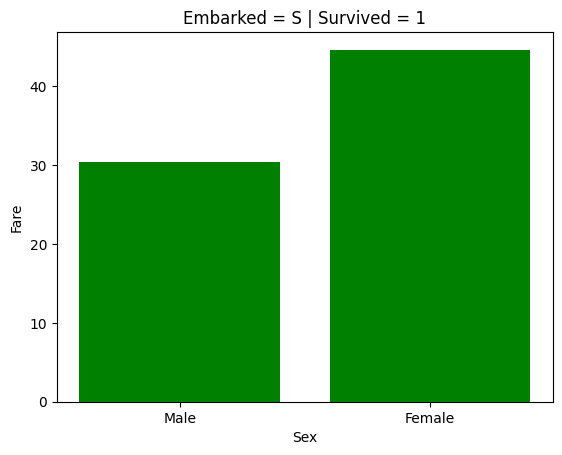

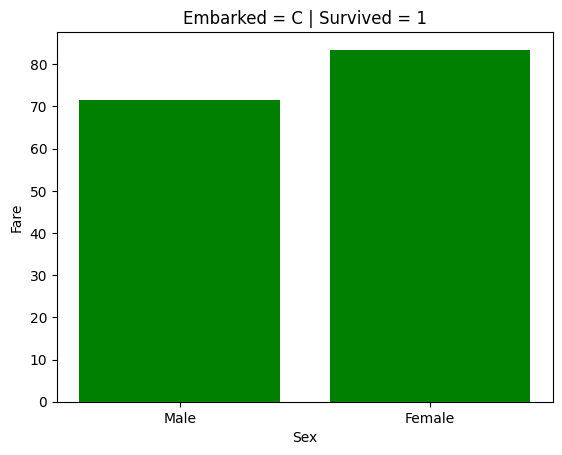

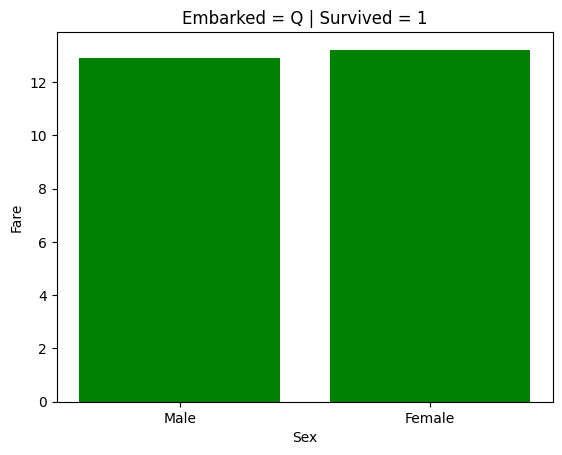

In [5]:
# Q13
survived = [0, 1]
embarked = ['S', 'C', 'Q']


sex_ES_MD = train_df[(train_df.Embarked == 'S') & (train_df.Survived == 0) & (train_df.Sex == 'male')]['Fare']
sex_ES_FD = train_df[(train_df.Embarked == 'S') & (train_df.Survived == 0) & (train_df.Sex == 'female')]['Fare']

sex_EC_MD = train_df[(train_df.Embarked == 'C') & (train_df.Survived == 0) & (train_df.Sex == 'male')]['Fare']
sex_EC_FD = train_df[(train_df.Embarked == 'C') & (train_df.Survived == 0) & (train_df.Sex == 'female')]['Fare']

sex_EQ_MD = train_df[(train_df.Embarked == 'Q') & (train_df.Survived == 0) & (train_df.Sex == 'male')]['Fare']
sex_EQ_FD = train_df[(train_df.Embarked == 'Q') & (train_df.Survived == 0) & (train_df.Sex == 'female')]['Fare']



sex_ES_MS = train_df[(train_df.Embarked == 'S') & (train_df.Survived == 1) & (train_df.Sex == 'male')]['Fare']
sex_ES_FS = train_df[(train_df.Embarked == 'S') & (train_df.Survived == 1) & (train_df.Sex == 'female')]['Fare']

sex_EC_MS = train_df[(train_df.Embarked == 'C') & (train_df.Survived == 1) & (train_df.Sex == 'male')]['Fare']
sex_EC_FS = train_df[(train_df.Embarked == 'C') & (train_df.Survived == 1) & (train_df.Sex == 'female')]['Fare']

sex_EQ_MS = train_df[(train_df.Embarked == 'Q') & (train_df.Survived == 1) & (train_df.Sex == 'male')]['Fare']
sex_EQ_FS = train_df[(train_df.Embarked == 'Q') & (train_df.Survived == 1) & (train_df.Sex == 'female')]['Fare']

# print(train_df['Fare'].sum())


# deaths
plt.figure()
genders = ['Male', 'Female']
# averages are stored in fares
# must be list of numeric datatypes
fares = [sex_ES_MD.sum() / len(sex_ES_MD), sex_ES_FD.sum() / len(sex_ES_FD)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = S | Survived = 0')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

plt.figure()
genders = ['Male', 'Female']
fares = [sex_EC_MD.sum() / len(sex_EC_MD), sex_EC_FD.sum() / len(sex_EC_FD)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = C | Survived = 0')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()


plt.figure()
genders = ['Male', 'Female']
fares = [sex_EQ_MD.sum() / len(sex_EQ_MD), sex_EQ_FD.sum() / len(sex_EQ_FD)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = Q | Survived = 0')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()


# # survivors
plt.figure()
genders = ['Male', 'Female']
fares = [sex_ES_MS.sum() / len(sex_ES_MS), sex_ES_FS.sum() / len(sex_ES_FS)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = S | Survived = 1')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

plt.figure()
genders = ['Male', 'Female']
fares = [sex_EC_MS.sum() / len(sex_EC_MS), sex_EC_FS.sum() / len(sex_EC_FS)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = C | Survived = 1')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

plt.figure()
genders = ['Male', 'Female']
fares = [sex_EQ_MS.sum() / len(sex_EQ_MS), sex_EQ_FS.sum() / len(sex_EQ_FS)]
plt.bar(genders, fares, color='green')
plt.title('Embarked = Q | Survived = 1')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

# higher paying passengers generally do have a better chance of survival but not always. For instance
# the graph of Embarked = S had a lot of male passenger deaths with high paying fares
# I think we should drop fare feature because of the outlier graph

Q14: In training set, what is the rate of duplicates for the Ticket feature? Is there a correlation
between Ticket and survival? Should we drop the Ticket feature?

In [12]:
# Q14
# total number of duplicate tickets / total number of tickets
print('{} %'.format((train_df['Ticket'].duplicated().sum() / train_df['Ticket'].count()) * 100))

# ticket is mixed data type and survival is just integers, so no correlation
# we should drop because theres no correlation


23.56902356902357 %


Q15: In the training set, Is the Cabin feature complete? How many null values there are in the Cabin
features of the combined dataset of training and test dataset? Should we drop the Cabin feature?

In [13]:
print(train_df['Cabin'].isna().sum())
print(train_df['Cabin'].count())
print(len(train_df['Cabin']))

print()

print(test_df['Cabin'].isna().sum())
print(test_df['Cabin'].count())
print(len(test_df['Cabin']))


687
204
891

327
91
418


Q16: In the training set, we can convert features which contain strings to numerical values. This is
required by most model algorithms. Doing so will also help us in achieving the feature completing
goal. In this question ,please convert Sex feature to a new feature called Gender where female=1
and male=0.

In [14]:
def gender_to_int(s: str) -> int:
  if s == 'male': return 0
  if s == 'female': return 1
  
  print('invalid string')
  return -1

train_df['Sex_in_numerical'] = train_df['Sex'].apply(gender_to_int)

print(train_df['Sex_in_numerical'])


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_in_numerical, Length: 891, dtype: int64


Q17: In the training set, we start estimating and completing features with missing or null values. We
will first do this for the Age feature. We can consider three methods to complete a numerical
continuous feature. A simple way is to generate random numbers between mean and standard
deviation. More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithm
to select the top-K most similar data points, and then use the top-K most similar data points to
impute the missing values of ages.

In [17]:
age_mean = train_df['Age'].mean()

# print(age_mean)
# print(train_df['Age'].isna().values.any())

train_df['Age'].fillna(value=age_mean,inplace = True)

29.69911764705882
True


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Q18: In the training set, complete a categorical feature: Embarked feature takes S, Q, C values
based on port of embarkation. Our training dataset has some missing values. Please simply fill these
with the most common occurrences.

In [29]:
embarked_mode = train_df['Embarked'].mode()
print(embarked_mode)
train_df['Embarked'].fillna(value=embarked_mode[0], inplace=True)

# train_df['Embarked']

0    S
Name: Embarked, dtype: object


Q19: In the training set, complete and convert a numeric feature. Please complete the Fare feature
for single missing value in test dataset using mode to get the value that occurs most frequently for
this feature.

In [21]:
test_df_fare_mode = test_df['Fare'].mode()
print(test_df_fare_mode[0])

print(test_df['Fare'].isna().any())
test_df['Fare'].fillna(value=test_df_fare_mode[0], inplace=True)
print(test_df['Fare'].isna().any())

7.75
True
False


Q20

In [23]:
def fare_to_ordinal_fare(fare: float) -> int:
  if fare <= -0.001: return -1

  if fare > -0.001 and fare <= 7.91: return 0
  if fare > 7.91 and fare <= 14.454: return 1
  if fare > 14.454 and fare <= 31.0: return 2
  if fare > 31.0 and fare <= 512.329: return 3

# train_df['Fare'].head()

train_df['Ordinal_Fare'] = train_df['Fare'].apply(fare_to_ordinal_fare)

train_df['Ordinal_Fare'].isna().any()
train_df['Ordinal_Fare'].dropna().astype(int)

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Ordinal_Fare, Length: 888, dtype: int64